# Implementación de Modelos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

###1.Load Data:


download data from: https://drive.google.com/drive/folders/1xjPE-SPFbUTmVM2EGy0R8iSG-eJEMCLN?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Colombia
Starting Date:  2003-01-24 00:00:00
(4620, 1)


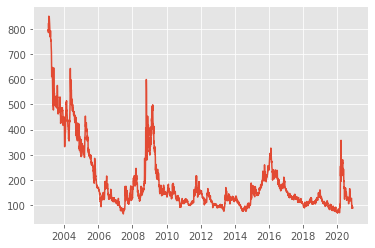

Mexico
Starting Date:  2001-10-12 00:00:00
(4889, 1)


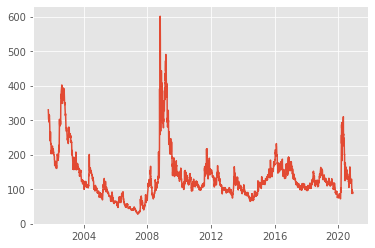

Chile
Starting Date:  2003-01-24 00:00:00
(4591, 12)


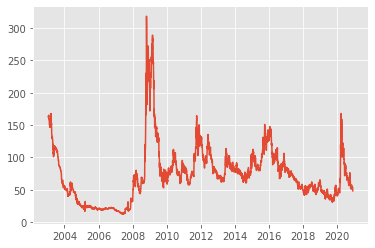

Brasil
Starting Date:  2001-10-12 00:00:00
(4882, 1)


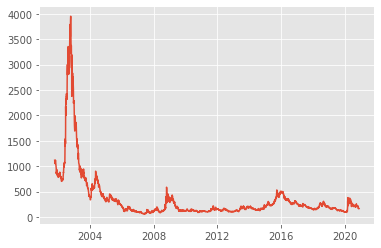

Rusia
Starting Date:  2000-11-27 00:00:00
(5031, 12)


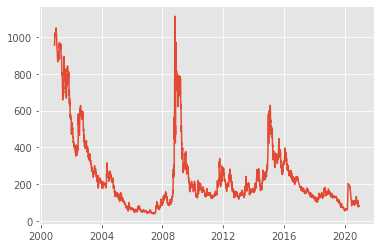

Japon
Starting Date:  2003-01-06 00:00:00
(3451, 12)


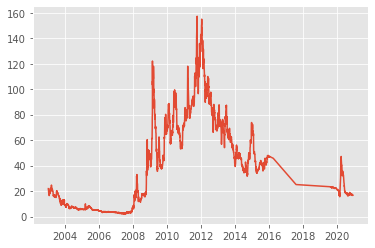

China
Starting Date:  2003-01-24 00:00:00
(4346, 12)


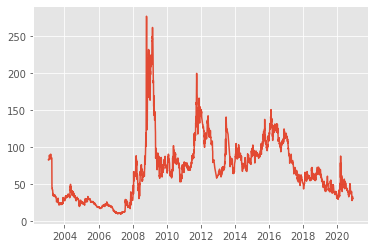

Francia
Starting Date:  2003-03-31 00:00:00
(4070, 12)


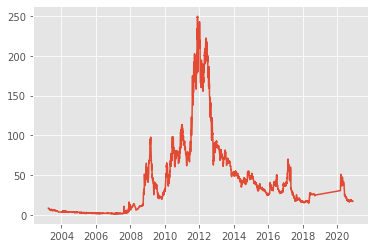

Alemania
Starting Date:  2003-03-03 00:00:00
(4003, 12)


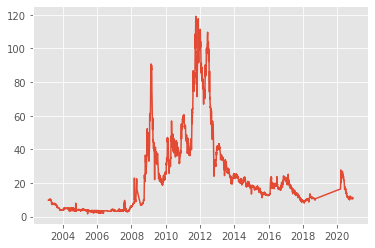

In [ ]:
CDS_list = ['Colombia','Mexico', 'Chile', 'Brasil', 'Rusia','Japon','China','Francia','Alemania'] #,'Argentina'
CDS_dictionary = {}

#Getting every country's CDS price history 
#into a Dataframe inside of a dictionary:
for country in CDS_list:
  try:
    CDS_dictionary[country] = pd.read_excel('/content/drive/MyDrive/Principal/universidad/data science/proyecto final/data/CDS_{}.xlsx'.format(country) ,header=6, index_col='Date')
  except:
    CDS_dictionary[country] = pd.read_excel('/content/drive/MyDrive/Principal/universidad/data science/proyecto final/data/CDS_{}_ohlc.xlsx'.format(country) ,header=6, index_col='Date')
  CDS_dictionary[country].sort_index(inplace=True)


#changing price column name into each countrie's name
for cds in CDS_dictionary:
  CDS_dictionary[cds] = CDS_dictionary[cds].rename(columns={'PX_LAST': cds})
  #CDS_dictionary[cds] = CDS_dictionary[cds][[cds]]

#Showing/printing info from CDSs
for cds in CDS_dictionary:
  print(cds)
  print('Starting Date: ', CDS_dictionary[cds].index.min())
  print(CDS_dictionary[cds].shape)
  plt.plot(CDS_dictionary[cds][cds])
  plt.show()

###2.Prepare Data

Colombia


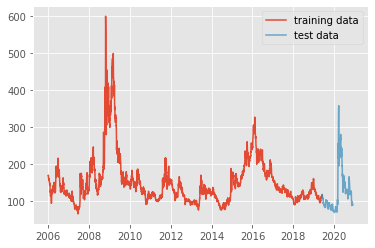

Mexico


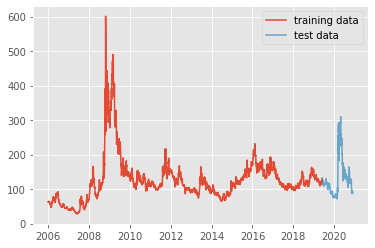

Chile


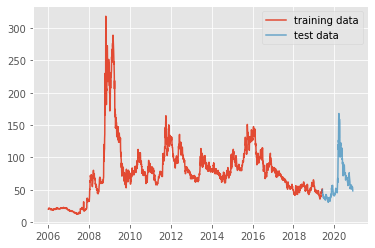

Brasil


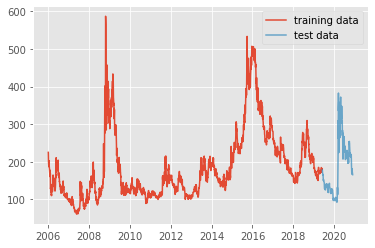

Rusia


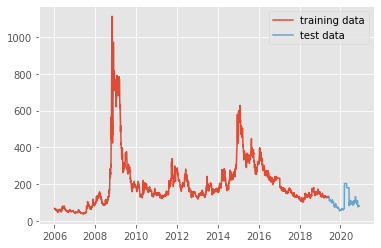

Japon


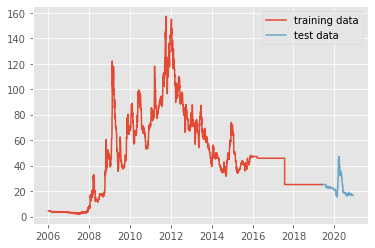

China


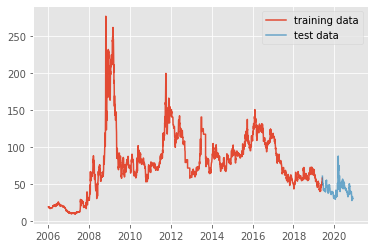

Francia


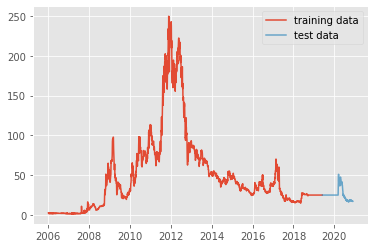

Alemania


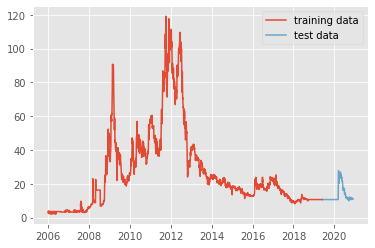

In [ ]:

#creating 1 dataframe to contain all historical prices
data = pd.DataFrame()
for cds in CDS_dictionary:
  data = data.join(CDS_dictionary[cds][cds],how='outer').fillna(method='ffill')
data = data.dropna()

#split data into train, and test
start_date = '2006'              #most of them start at 2003, so that's the minimum recomended
split_date = '2019-06'           #it could be only a year, 'year-month' or 'year-month-day'
train_data = data.loc[start_date : split_date[0:-1] + str(int(split_date[-1])-1)]
test_data = data.loc[split_date:]

#plotting price data
for cds in data.columns:
  print(cds)
  plt.plot(train_data[cds],label='training data')
  plt.plot(test_data[cds],alpha=0.7,label='test data')
  plt.legend()
  plt.show()

##Redes LSTM

link: https://youtu.be/3kXj6VgxbP8

In [ ]:
np.random.seed(4)
import datetime 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Normalización del set de entrenamiento
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(train_data)


In [ ]:

# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento

time_step = 30
dias_pronostico = time_step

def XY_train(set_escalado, time_step=time_step, dias_pronostico=dias_pronostico):
  X_train = []
  Y_train = []
  for i in range(time_step,len(set_escalado)-dias_pronostico):
      # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
      X_train.append(set_escalado[i-time_step:i])
      # Y: el siguiente dato
      Y_train.append(set_escalado[i:i+dias_pronostico])
  return np.array(X_train), np.array(Y_train)

X_train, Y_train = XY_train(set_entrenamiento_escalado)

In [ ]:
# Reshape X_train para que se ajuste al modelo en Keras
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],X_train.shape[2], 1))

In [ ]:
# Red LSTM

def train_lstm(X_train, Y_train, na = 50,epochs = 20,batch_size = 32):
  dim_entrada = (X_train.shape[1:])
  #dim_salida = Y_train.shape[1], Y_train.shape[2]
  modelo = Sequential()
  modelo.add(LSTM(units=na, input_shape=dim_entrada, return_sequences = True))
  modelo.add(Dense(units=Y_train.shape[2]))#, input_shape=X_train.shape[:]))
  modelo.compile(optimizer='rmsprop', loss='mse')
  modelo.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size)
  return modelo

modelo = train_lstm(X_train,Y_train)

Epoch 1/20
108/108 [==============================] - 1s 12ms/step - loss: 0.0128
Epoch 2/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0062
Epoch 3/20
108/108 [==============================] - 2s 14ms/step - loss: 0.0053
Epoch 4/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0049
Epoch 5/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0045
Epoch 6/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 7/20
108/108 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 8/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 9/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 10/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 11/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0037
Epoch 12/20
108/108 [==============================] - 1s 13ms/step - loss: 0.0036
Epoch 13/20
1

In [ ]:
# Validación (predicción del valor de las acciones)
# 

X_test = []
for i in range(len(set_entrenamiento_escalado)-dias_pronostico, len(set_entrenamiento_escalado)):
    X_test.append(set_entrenamiento_escalado[i-time_step:i])
X_test = np.array(X_test)

predicciones = modelo.predict(X_test)
prediccion = sc.inverse_transform(predicciones[-1][::-1])

Colombia


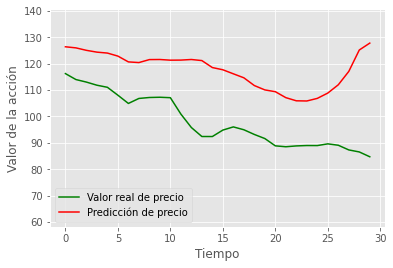

Mexico


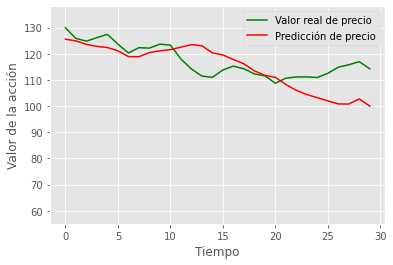

Chile


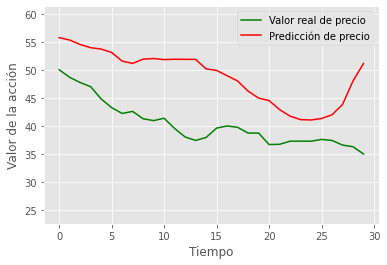

Brasil


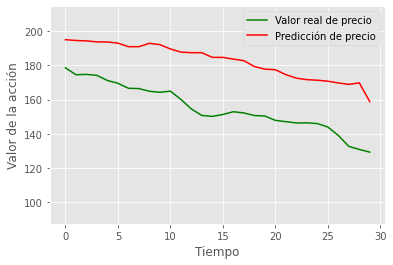

Rusia


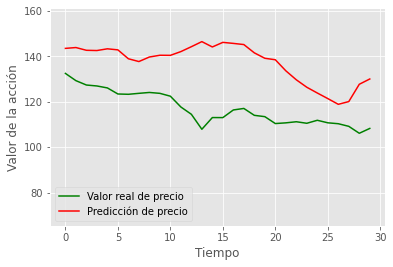

Japon


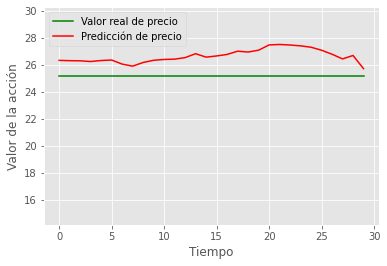

China


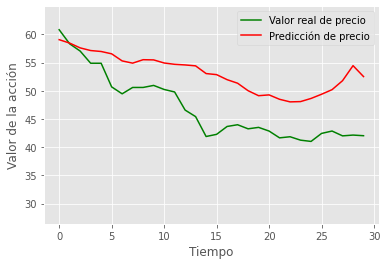

Francia


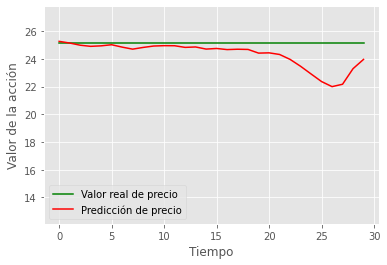

Alemania


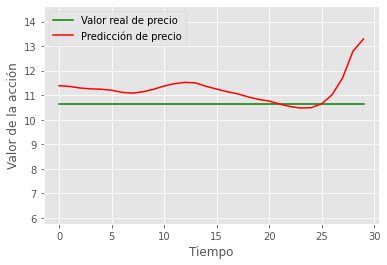

In [ ]:
# Funcion auxiliar
def graficar_predicciones(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='g', label='Valor real de precio')
    plt.plot(prediccion, color='red', label='Predicción de precio')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

# Graficar resultados
for i in range(0,len(test_data.columns)):
  print(data.columns[i])
  graficar_predicciones(test_data.values[:,i],prediccion[:,i])

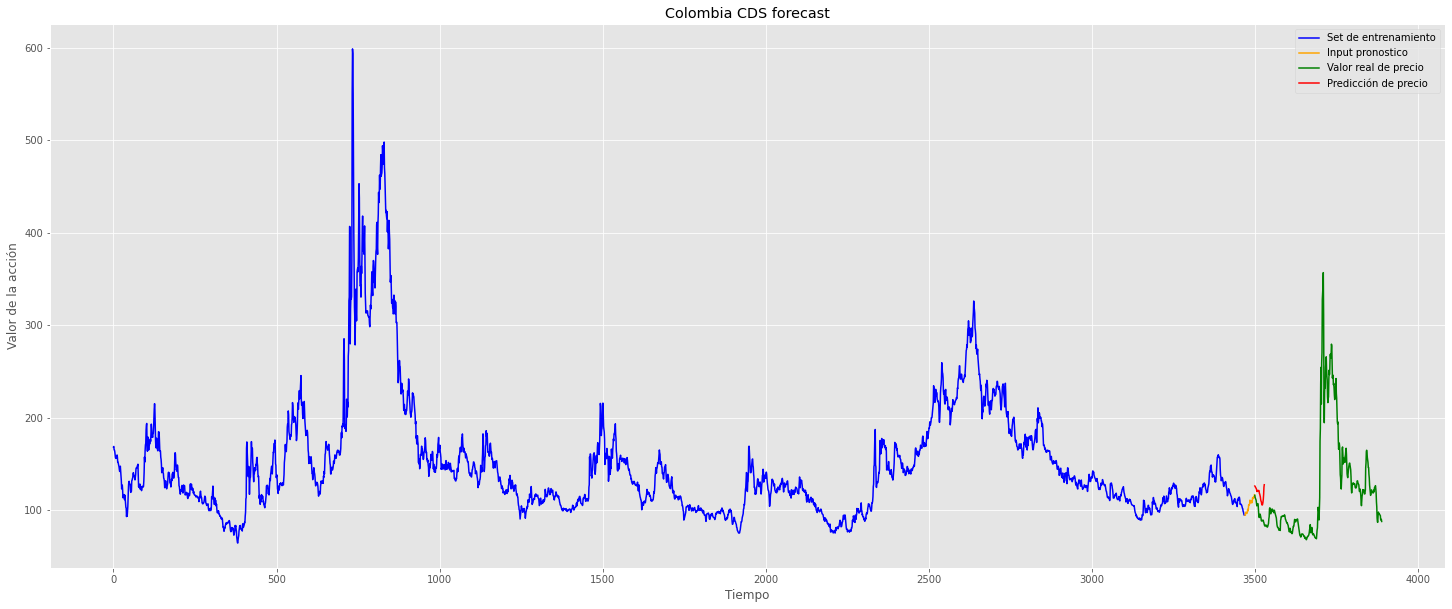

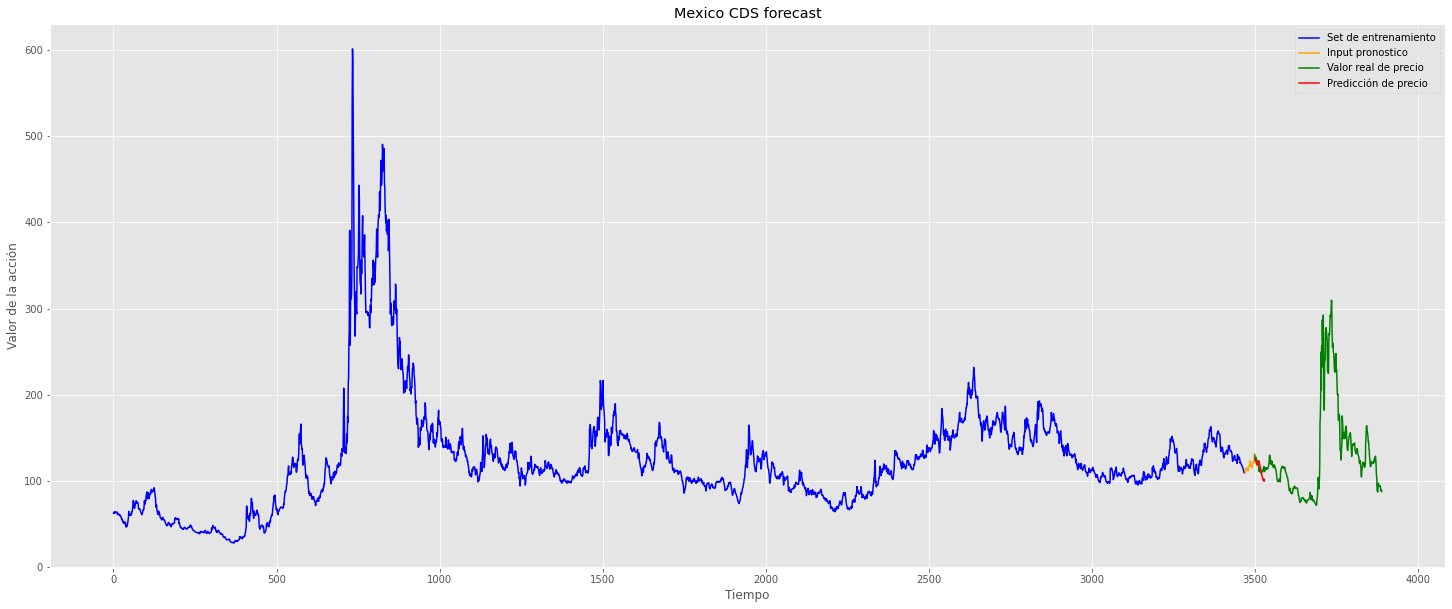

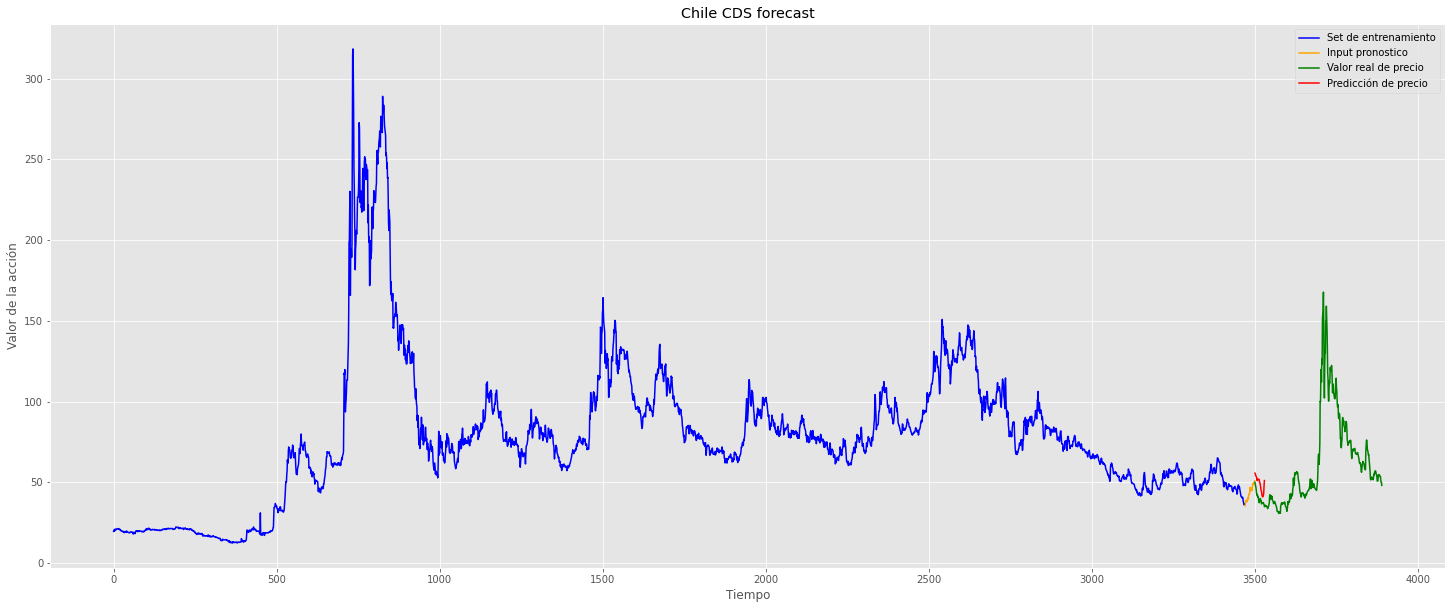

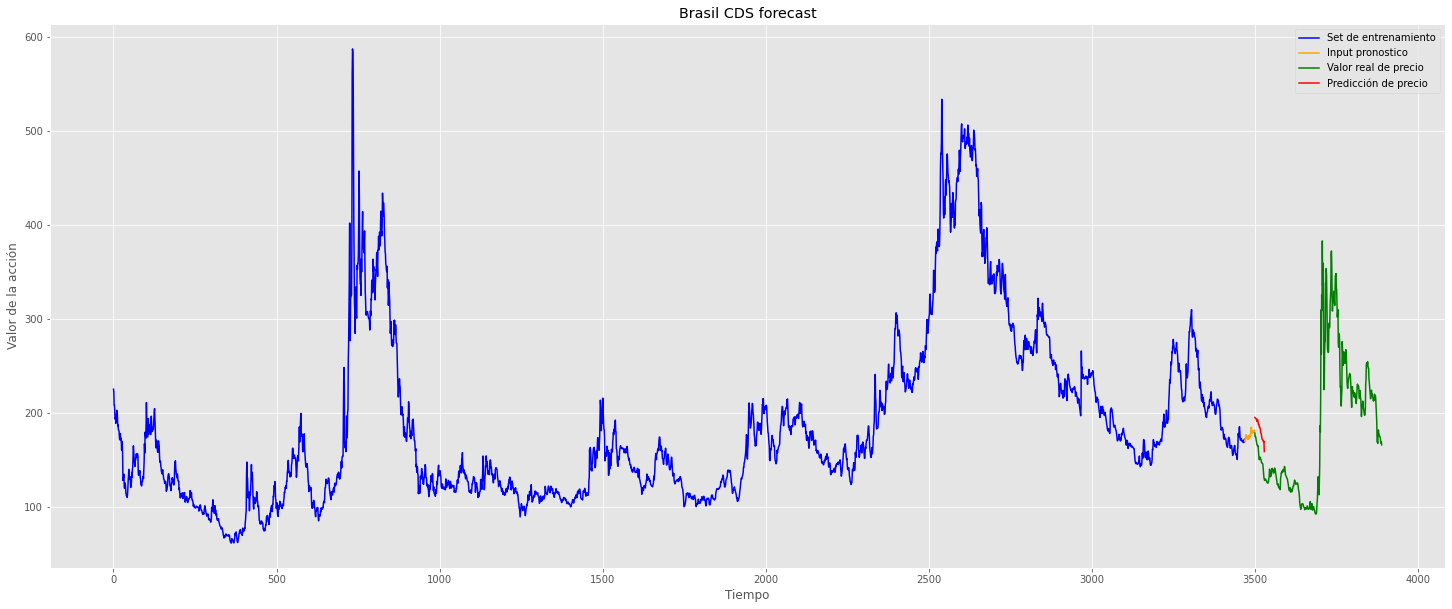

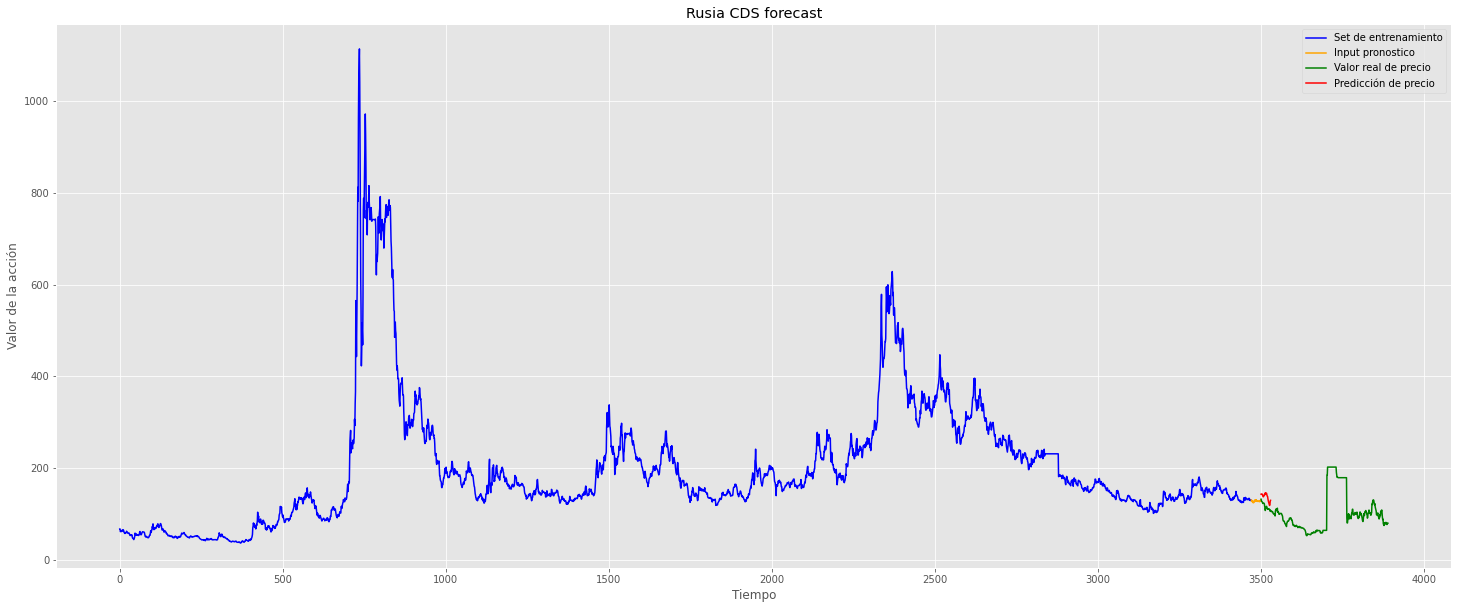

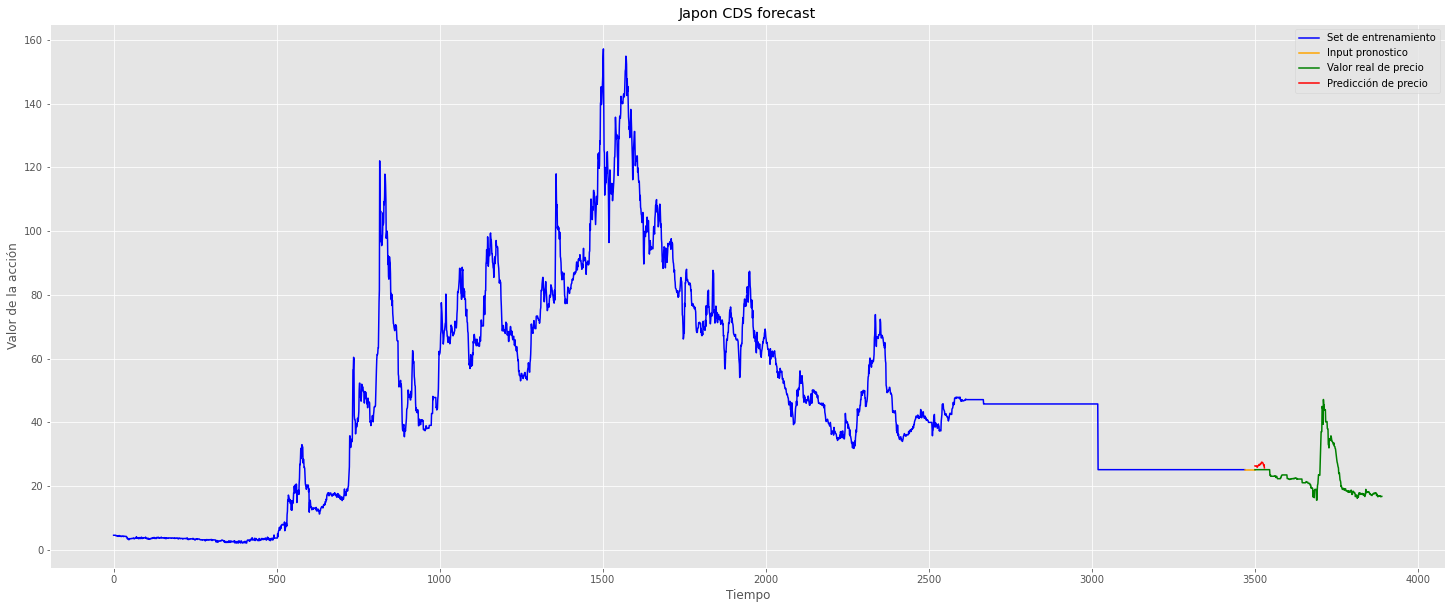

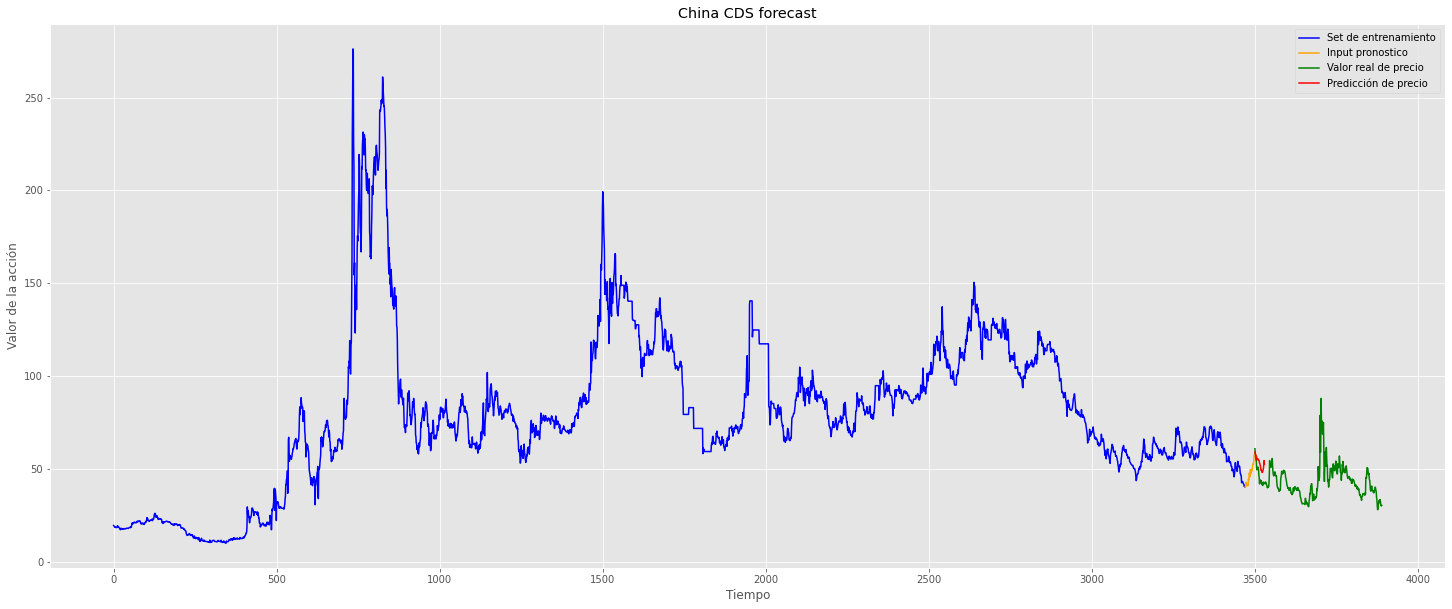

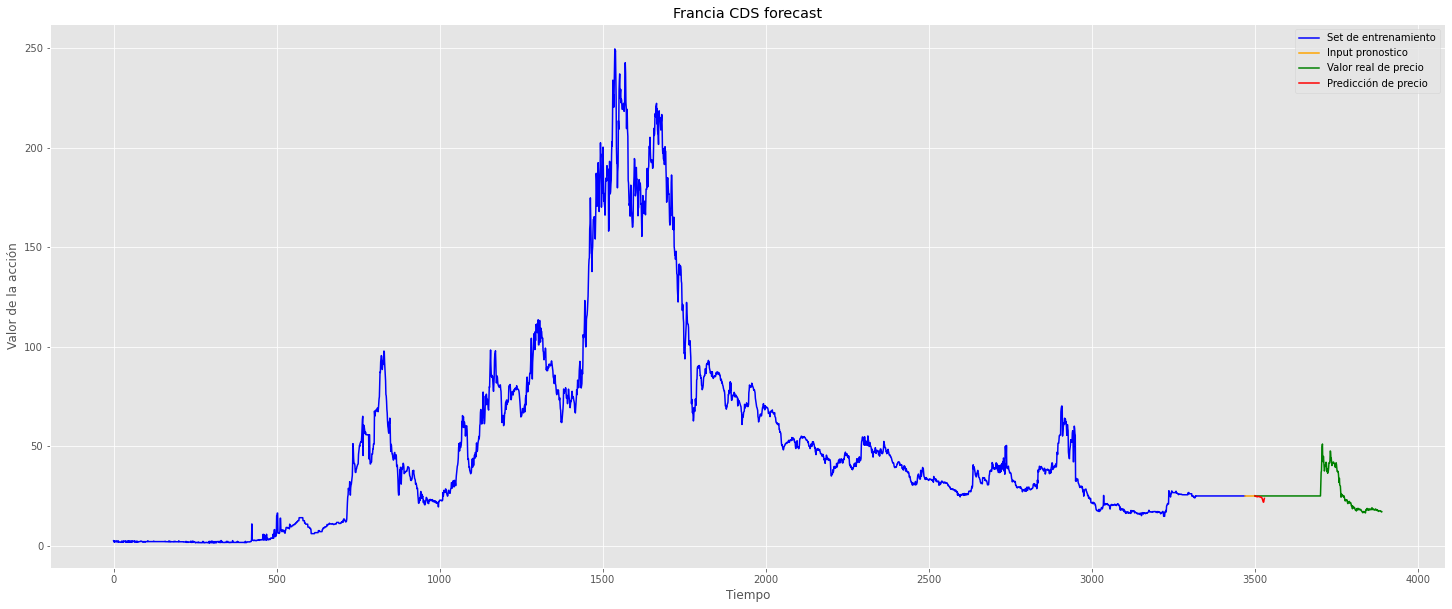

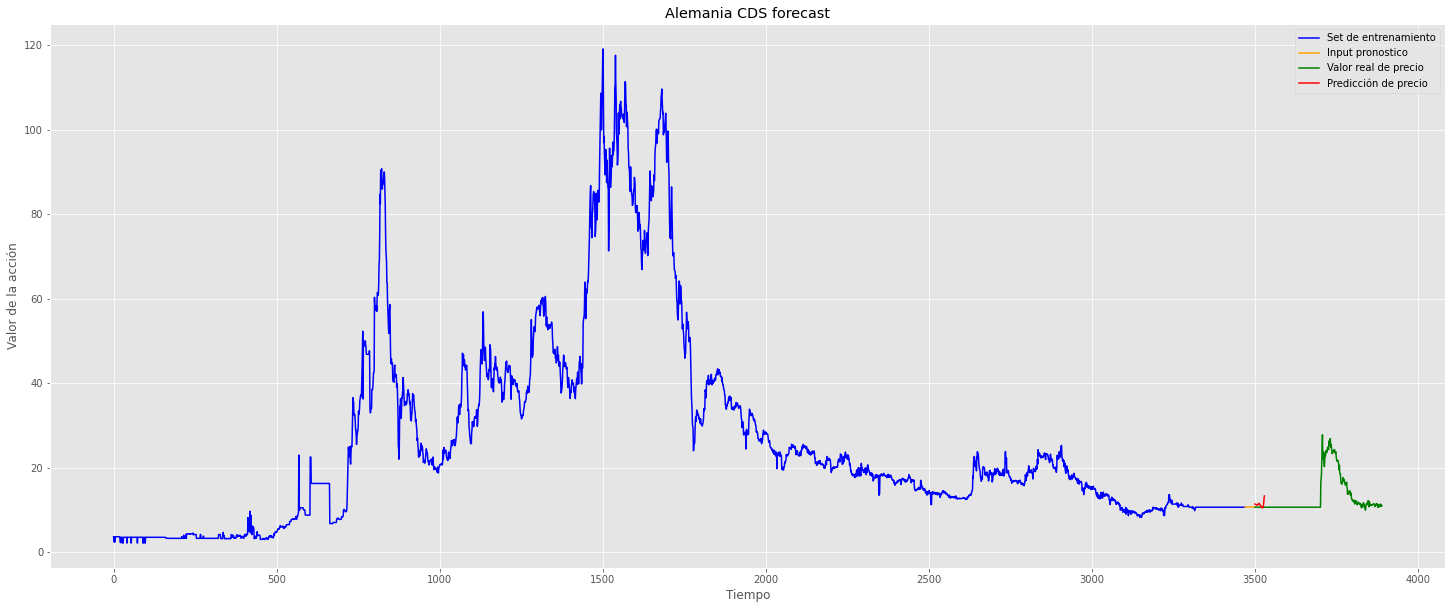

In [ ]:
for i in range(0,len(test_data.columns)):
  n1 = len(train_data.values)
  n2 = len(test_data.values)
  n3 = len(prediccion)+time_step
  # Graficar resultados
  fig = plt.figure(figsize=(25,10))
  fig.tight_layout()
  plt.plot(train_data.values[:(dias_pronostico*-1),i],color='blue', label='Set de entrenamiento')
  plt.plot(range(n1-dias_pronostico, n1, 1), train_data.values[(dias_pronostico*-1):,i],color='orange', label='Input pronostico')
  plt.plot(range(n1, n1+n2, 1), test_data.values[:,i],color='g', label='Valor real de precio')
  #plt.plot(range(n1+time_step+(dias_pronostico-1), n1+n3+(dias_pronostico-1), 1), prediccion[:,i],color='red' , label='Predicción de precio')
  plt.plot(range(n1, n1+len(prediccion), 1), prediccion[:,i],color='red' , label='Predicción de precio')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor de la acción')
  plt.title(data.columns[i] + ' CDS forecast')
  plt.legend()
  plt.show()

# Evaluación de Resultados

 ***Forecast Error***

 https://youtu.be/19sULW0Bidw

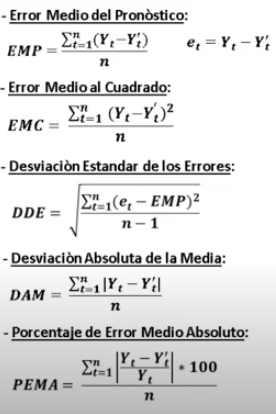

### LSTM:

EMP: Error Medio de Pronostico

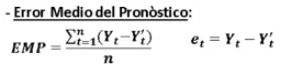

In [ ]:
EMP_LSTM = {}
for i in range(0,len(data.columns)):
  EMP_LSTM[data.columns[i]] = []
  for row in range(0,len(prediccion)):
    EMP_LSTM[data.columns[i]].append(test_data.values[row,i] - prediccion[row,i])
  EMP_LSTM[data.columns[i]] = sum(EMP_LSTM[data.columns[i]])/len(EMP_LSTM[data.columns[i]])
  print(data.columns[i] +': Error Medio de Pronóstico: ', EMP_LSTM[data.columns[i]])

Colombia: Error Medio de Pronóstico:  -19.72021288655599
Mexico: Error Medio de Pronóstico:  2.3308692260742205
Chile: Error Medio de Pronóstico:  -8.61558427022298
Brasil: Error Medio de Pronóstico:  -27.665925821940107
Rusia: Error Medio de Pronóstico:  -20.381390995279954
Japon: Error Medio de Pronóstico:  -1.4905522511800133
China: Error Medio de Pronóstico:  -6.194822947184245
Francia: Error Medio de Pronóstico:  0.8345938059488925
Alemania: Error Medio de Pronóstico:  -0.6117241859436036


EMC: Error Medio al Cuadrado

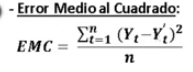

In [ ]:
EMC_LSTM = {}
for i in range(0,len(data.columns)):
  EMC_LSTM[data.columns[i]] = []
  for row in range(0,len(prediccion)):
    EMC_LSTM[data.columns[i]].append((test_data.values[row,i] - prediccion[row,i])**2)
  EMC_LSTM[data.columns[i]] = sum(EMC_LSTM[data.columns[i]])/len(EMC_LSTM[data.columns[i]])
  print(data.columns[i] +': Error Medio al Cuadrado: ', EMC_LSTM[data.columns[i]])

Colombia: Error Medio al Cuadrado:  444.8033029090749
Mexico: Error Medio al Cuadrado:  51.552576375996566
Chile: Error Medio al Cuadrado:  84.58063740490472
Brasil: Error Medio al Cuadrado:  793.0101623912466
Rusia: Error Medio al Cuadrado:  472.20972650182324
Japon: Error Medio al Cuadrado:  2.4466026942926007
China: Error Medio al Cuadrado:  48.754405013614175
Francia: Error Medio al Cuadrado:  1.5049356591636953
Alemania: Error Medio al Cuadrado:  0.7105425582432568


DDE: Desviación Estandar de los Errores

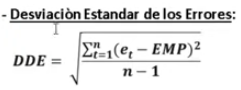

In [ ]:
DDE_LSTM = {}
for i in range(0,len(data.columns)):
  DDE_LSTM[data.columns[i]] = []
  for row in range(0,len(prediccion)):
    DDE_LSTM[data.columns[i]].append(((test_data.values[row,i] - prediccion[row,i]) - EMP_LSTM[data.columns[i]]) **2)
  DDE_LSTM[data.columns[i]] = np.sqrt(sum(DDE_LSTM[data.columns[i]])/len(DDE_LSTM[data.columns[i]])-1)
  print(data.columns[i] + ': Desviación Estándar de los Errores: ', DDE_LSTM[data.columns[i]])

Colombia: Desviación Estándar de los Errores:  7.410567226466947
Mexico: Desviación Estándar de los Errores:  6.71711433778946
Chile: Desviación Estándar de los Errores:  3.0581604090680146
Brasil: Desviación Estándar de los Errores:  5.158169327014597
Rusia: Desviación Estándar de los Errores:  7.470517224352324
Japon: Desviación Estándar de los Errores:  nan
China: Desviación Estándar de los Errores:  3.062445700196768
Francia: Desviación Estándar de los Errores:  nan
Alemania: Desviación Estándar de los Errores:  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


DAM: Desviación Absoluta de la Media

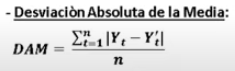

In [ ]:
DAM_LSTM = {}
for i in range(0,len(data.columns)):
  DAM_LSTM[data.columns[i]] = []
  for row in range(0,len(prediccion)):
    DAM_LSTM[data.columns[i]].append(abs(test_data.values[row,i] - prediccion[row,i]))
  DAM_LSTM[data.columns[i]] = sum(DAM_LSTM[data.columns[i]])/len(DAM_LSTM[data.columns[i]])
  print(data.columns[i] + ': Desviación Absoluta de la Media: ', DAM_LSTM[data.columns[i]])

Colombia: Desviación Absoluta de la Media:  19.72021288655599
Mexico: Desviación Absoluta de la Media:  5.567158532714843
Chile: Desviación Absoluta de la Media:  8.61558427022298
Brasil: Desviación Absoluta de la Media:  27.665925821940107
Rusia: Desviación Absoluta de la Media:  20.381390995279954
Japon: Desviación Absoluta de la Media:  1.4905522511800133
China: Desviación Absoluta de la Media:  6.31235532023112
Francia: Desviación Absoluta de la Media:  0.841065772501627
Alemania: Desviación Absoluta de la Media:  0.6362847328186035


PEMA: Porcentaje de Error Medio Absoluto

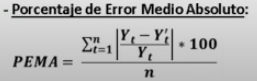

In [ ]:
PEMA_LSTM = {}
for i in range(0,len(data.columns)):
  PEMA_LSTM[data.columns[i]] = []
  for row in range(0,len(prediccion)):
    PEMA_LSTM[data.columns[i]].append(abs((test_data.values[row,i] - prediccion[row,i]) / test_data.values[row,i])*100)
  PEMA_LSTM[data.columns[i]] = round(sum(PEMA_LSTM[data.columns[i]])/len(PEMA_LSTM[data.columns[i]]),2)
  print(data.columns[i] + ': Porcentaje de Error Medio Absoluto: ' + str(PEMA_LSTM[data.columns[i]]) + '%')

Colombia: Porcentaje de Error Medio Absoluto: 20.84%
Mexico: Porcentaje de Error Medio Absoluto: 4.82%
Chile: Porcentaje de Error Medio Absoluto: 21.66%
Brasil: Porcentaje de Error Medio Absoluto: 18.19%
Rusia: Porcentaje de Error Medio Absoluto: 17.64%
Japon: Porcentaje de Error Medio Absoluto: 5.92%
China: Porcentaje de Error Medio Absoluto: 14.23%
Francia: Porcentaje de Error Medio Absoluto: 3.34%
Alemania: Porcentaje de Error Medio Absoluto: 5.99%
